<a href="https://colab.research.google.com/github/openmymai/ComputerVision/blob/main/Train_yolov8_object_detection_on_pill_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo checks # mode=checks is deprecated

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.7/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Gx7GvGgbWDsya2K2EJvg")
project = rf.workspace("hardee").project("capsules-mywnz")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Capsules-1 in yolov11:: 100%|██████████| 1004/1004 [00:00<00:00, 4807.08it/s]


In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800

100% 18.4M/18.4M [00:00<00:00, 220MB/s]
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Capsules-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [ ]:
!ls runs/detect/train

args.yaml					   PR_curve.png		train_batch2432.jpg
confusion_matrix_normalized.png			   R_curve.png		train_batch2.jpg
confusion_matrix.png				   results.csv		val_batch0_labels.jpg
events.out.tfevents.1735273588.ff51bc0e919b.842.0  results.png		val_batch0_pred.jpg
F1_curve.png					   train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				   train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					   train_batch2430.jpg	weights
P_curve.png					   train_batch2431.jpg


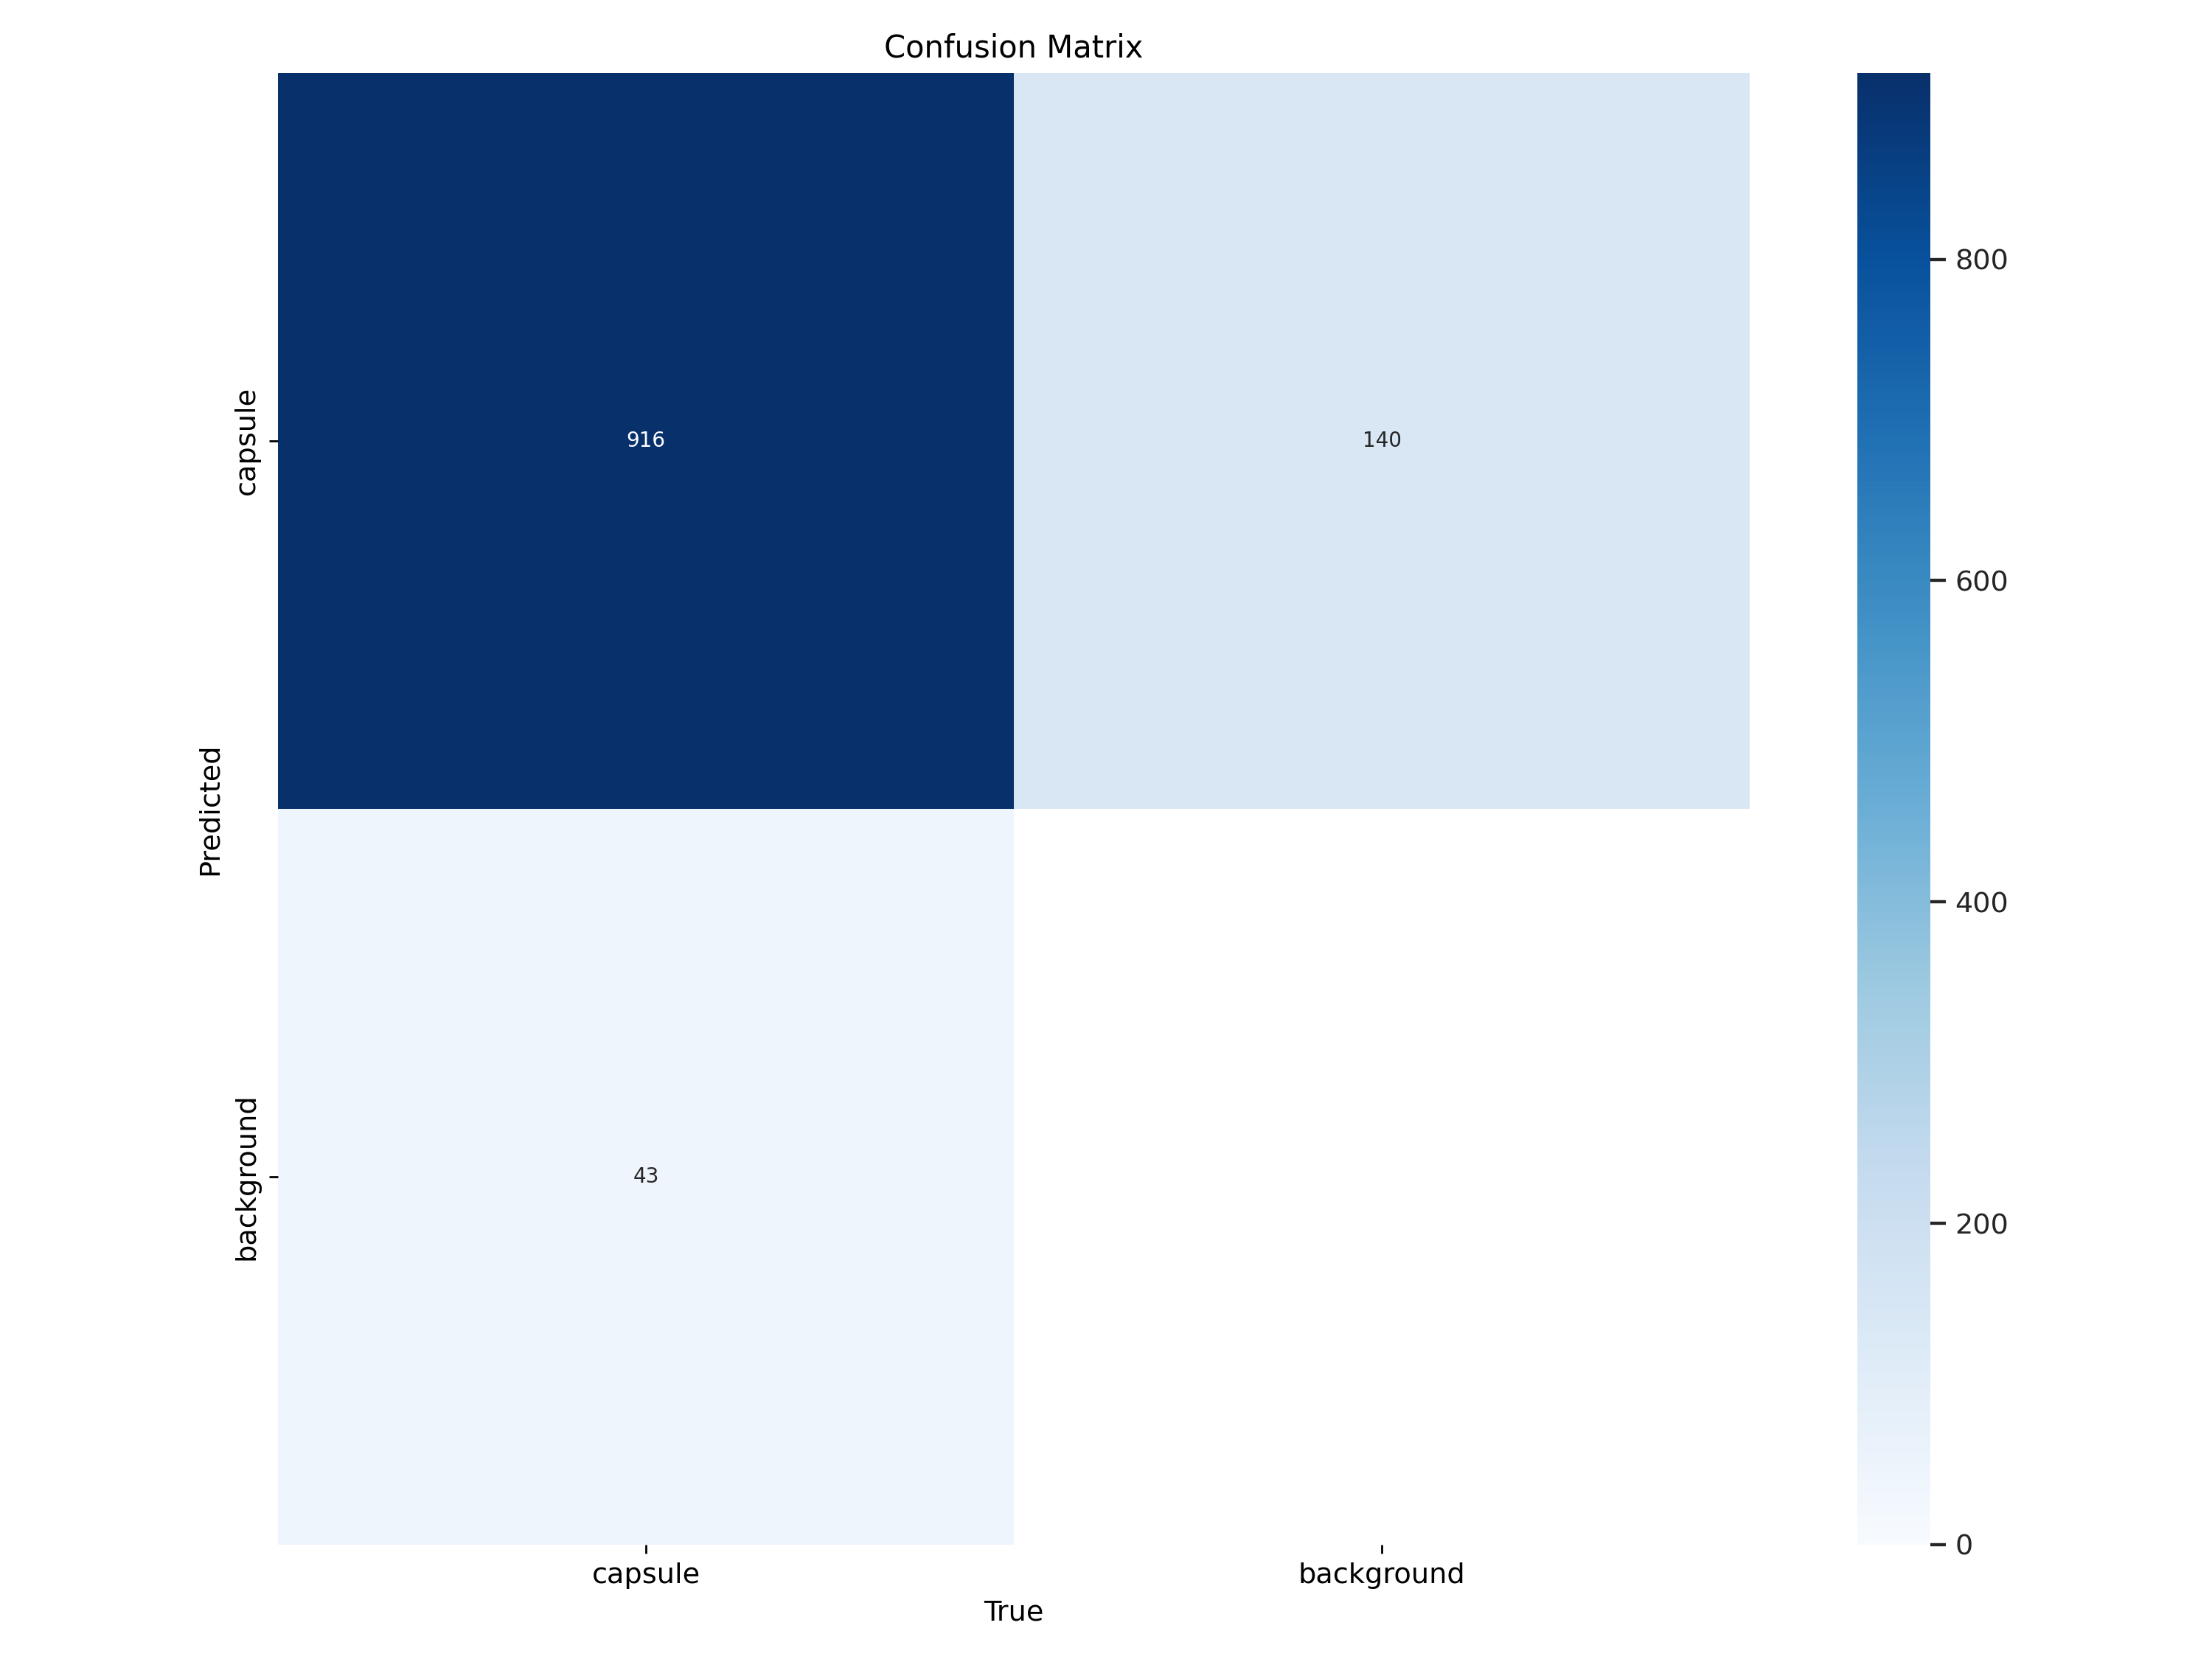

In [ ]:
Image(filename=f'runs/detect/train/confusion_matrix.png')

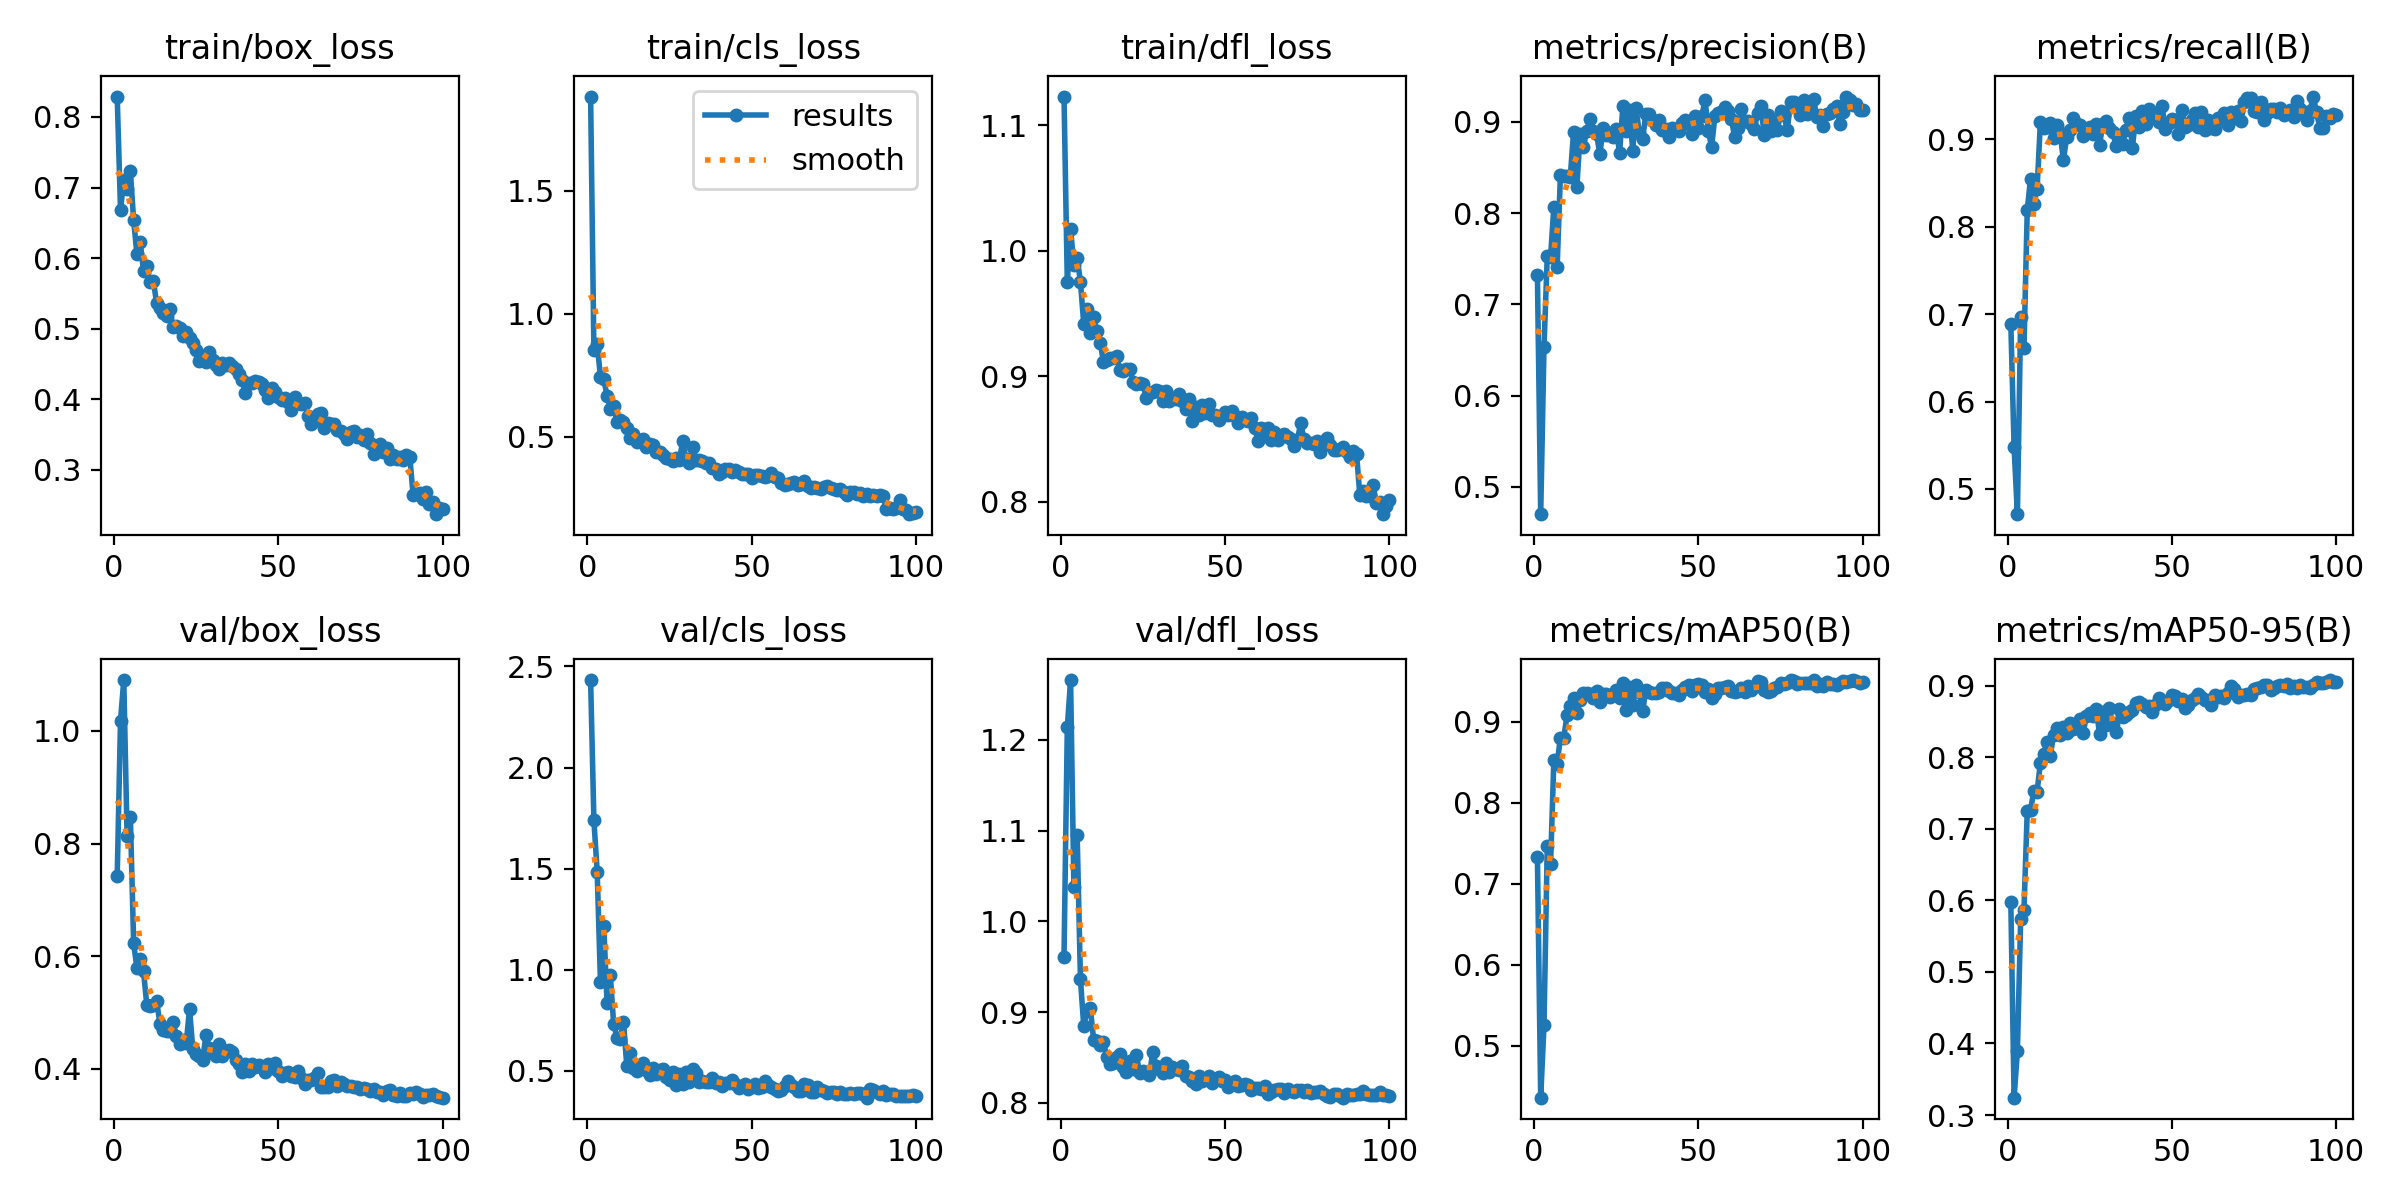

In [ ]:
Image(filename=f'runs/detect/train/results.png')

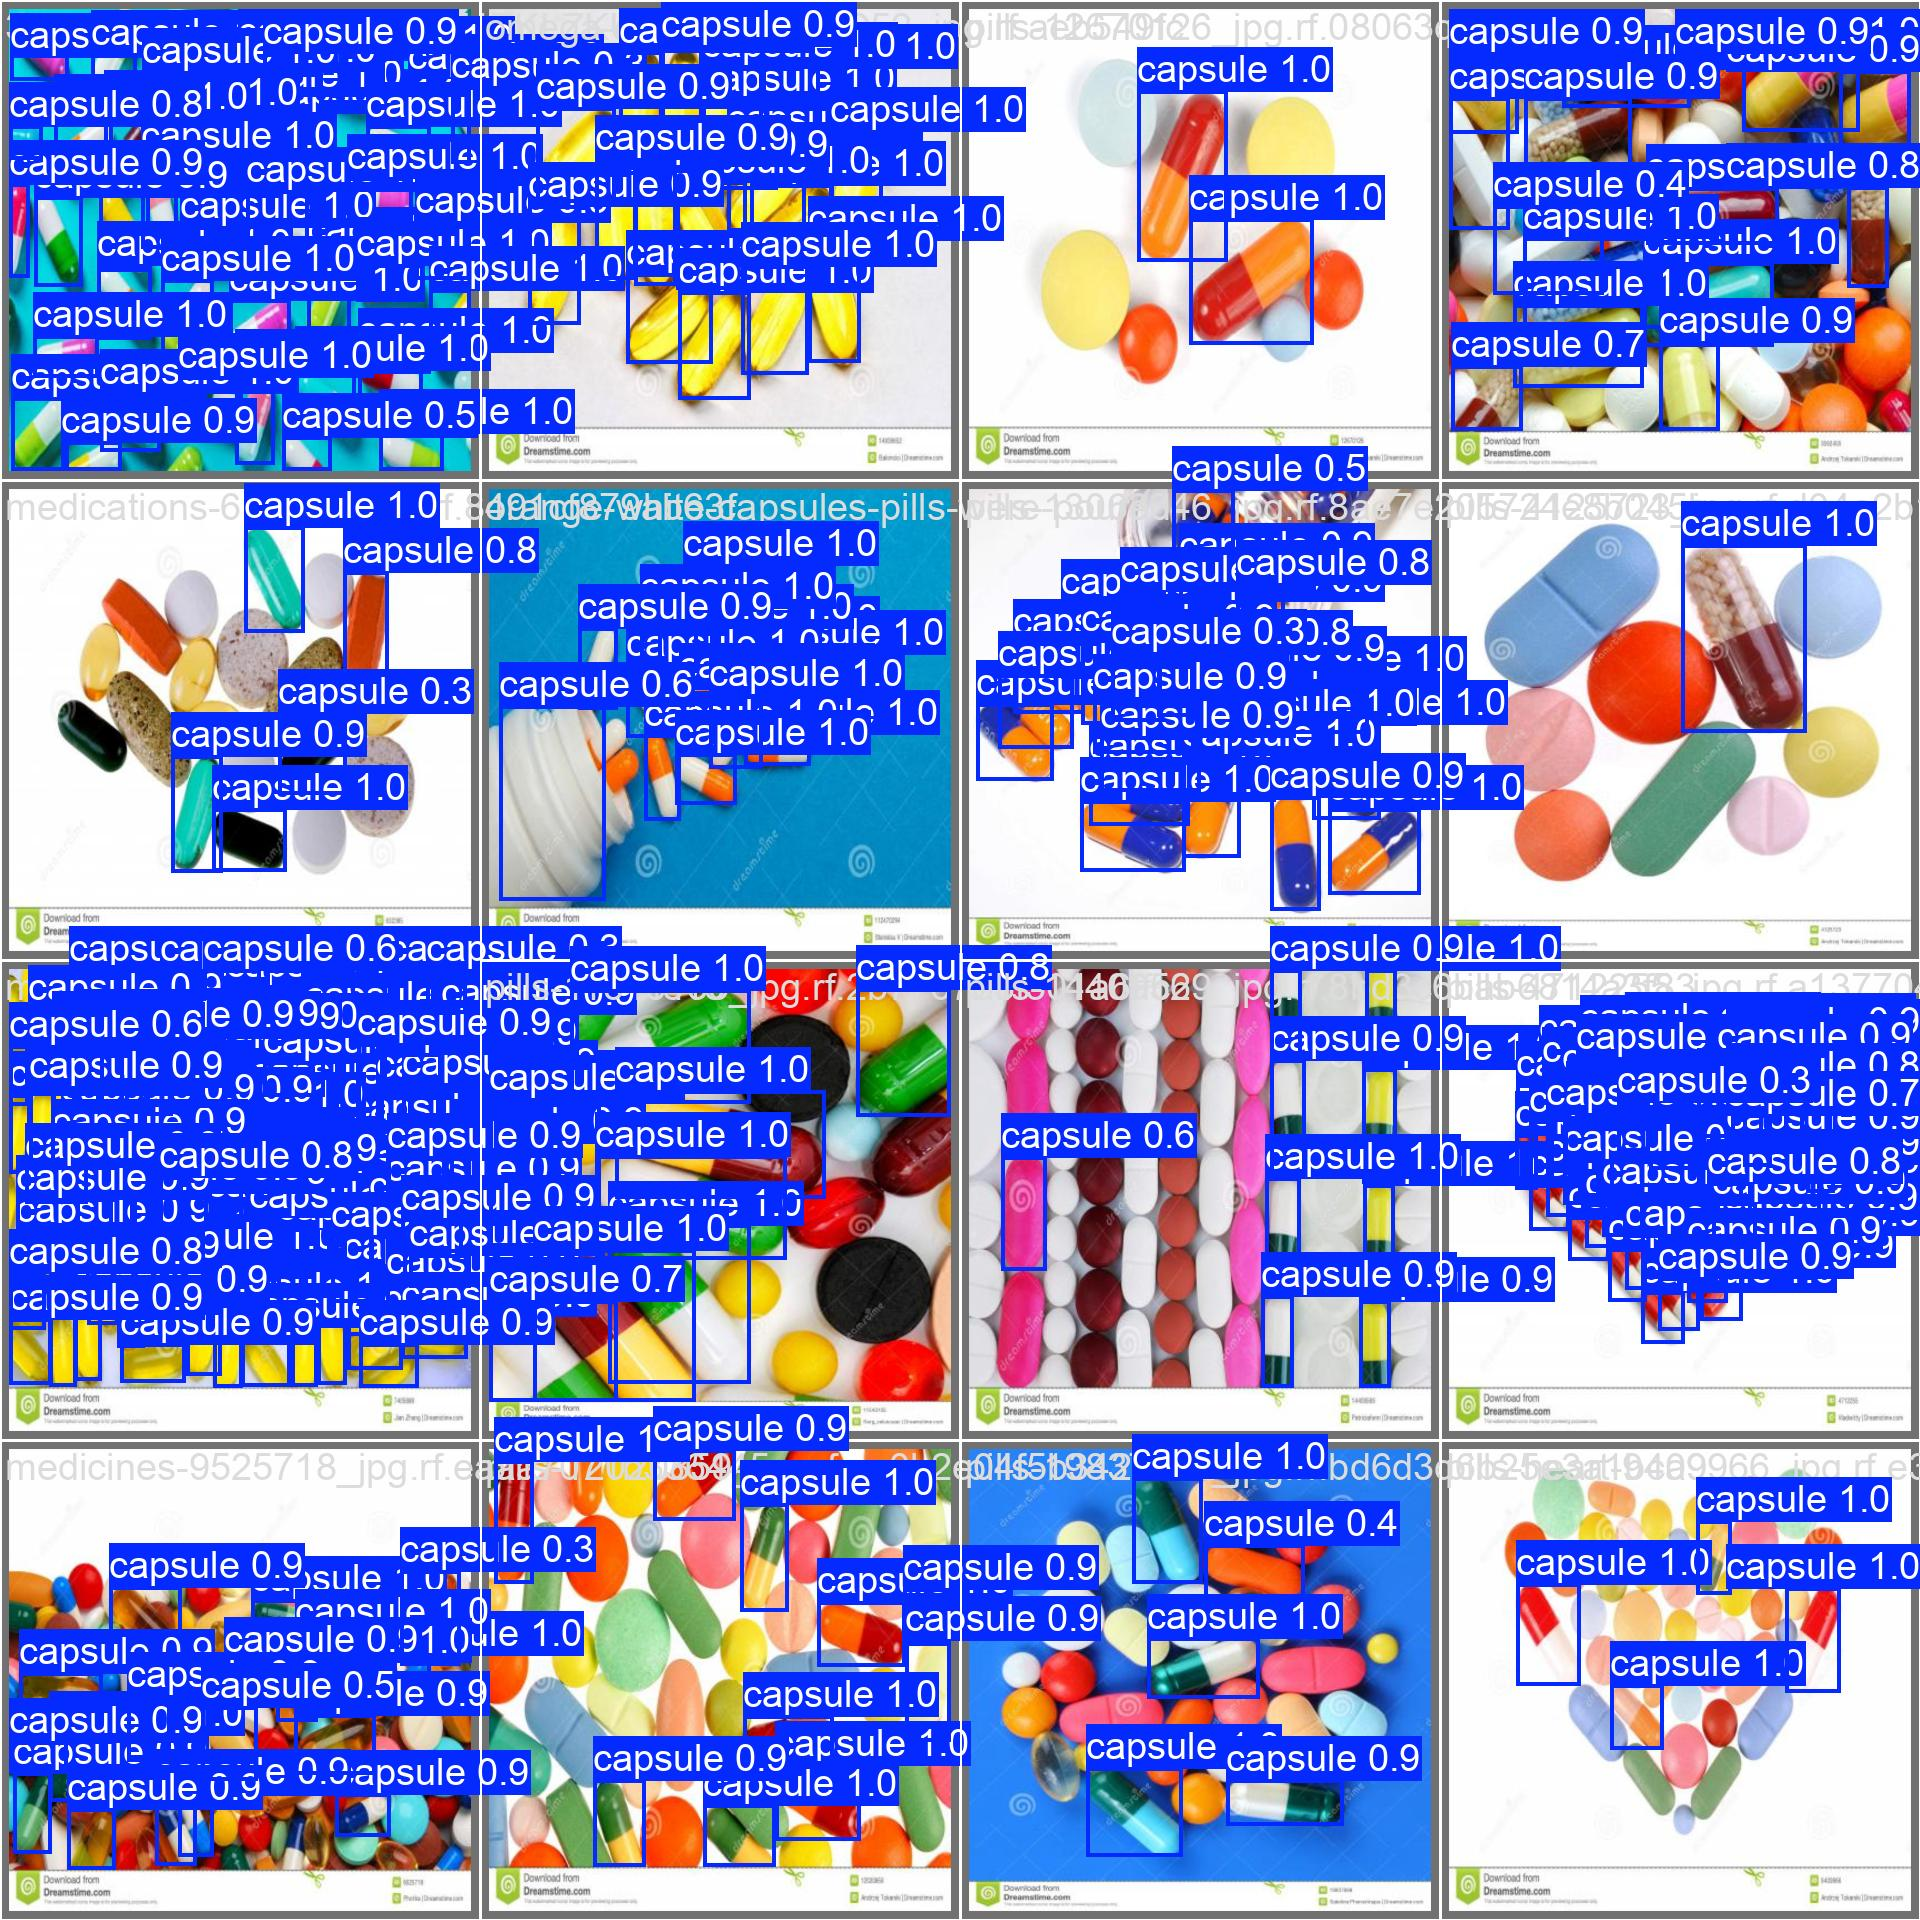

In [ ]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg')

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/Capsules-1/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.08s/it]
                   all         49        959      0.919      0.924      0.951       0.91
Speed: 5.1ms preprocess, 22.8ms inference, 0.0ms loss, 13.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/29 /content/Capsules-1/test/images/516_jpg.rf.2ad765d2213ae9fdbe94877871f79316.jpg: 800x800 9 capsules, 21.3ms
image 2/29 /content/Capsules-1/test/images/bowl-filled-medicine-pills-white-tablecloth-pandemic-175727160_jpg.rf.3cd11cb3e749d194729029acef21f783.jpg: 800x800 52 capsules, 21.3ms
image 3/29 /content/Capsules-1/test/images/capsules-12867679_jpg.rf.fa62233bfbc1b562098481bcc97b3c4b.jpg: 800x800 12 capsules, 21.2ms
image 4/29 /content/Capsules-1/test/images/capsules-medication-10443090_jpg.rf.c5b90864a0e15b3c19e5397509c9b235.jpg: 800x800 21 capsules, 21.2ms
image 5/29 /content/Capsules-1/test/images/close-up-blue-medical-capsules-white-background-50211128_jpg.rf.e2829296b2e89f447c6b3e5d54263975.jpg: 800x800 4 capsules, 21.2ms
image 6/29 /content/Capsules-1/test/images/detail-pile-colorful-medicine-pills-38466

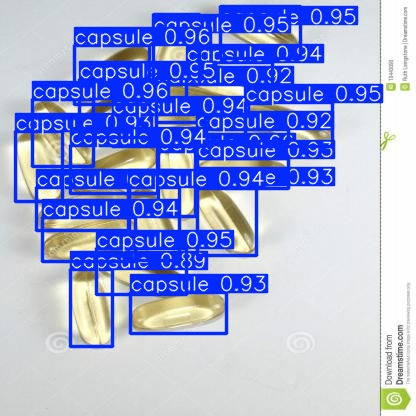

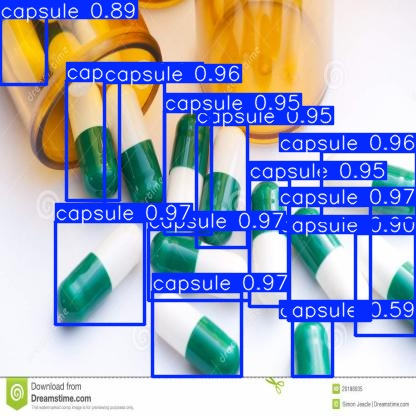

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:2]:
  display(Image(filename=image_path, width=600))
  print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f'runs/detect/train/')

Dependency ultralytics==8.0.196 is required but found version=8.3.55, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/tg-ku4o6/capsule_detection-beiml/1
Share your model with the world at: https://universe.roboflow.com/tg-ku4o6/capsule_detection-beiml/model/1


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls runs/detect/train/weights

best.pt  last.pt


In [ ]:
!cp runs/detect/train/weights/best.pt /content/gdrive/MyDrive/capsulebest.pt